# 1. Softmax Regression: IRIS Dataset

### Preparation

In [1]:
# Import modules
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

### Prepare Dataset

In [2]:
# Load dataset
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
x = iris.data
y = iris.target

print(x, y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [4]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.1, 
                                                    random_state = 85)

print('x_train: ', len(x_train))
print('x_test: ', len(x_test))
print('y_train: ', len(y_train))
print('y_test: ', len(y_test))

x_train:  135
x_test:  15
y_train:  135
y_test:  15


In [5]:
# Convert data to PyTorch tensors (IMPORTANT TO CHANGE TO TENSOR TYPE)
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()

x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).float()

print('x_train: ', x_train)
print('y_train: ', y_train)
print('x_test: ', x_test)
print('y_test: ', y_test)

x_train:  tensor([[6.4000, 2.9000, 4.3000, 1.3000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [6.5000, 3.0000, 5.2000, 2.0000],
        [6.4000, 2.7000, 5.3000, 1.9000],
        [5.6000, 2.5000, 3.9000, 1.1000],
        [4.5000, 2.3000, 1.3000, 0.3000],
        [5.7000, 2.6000, 3.5000, 1.0000],
        [6.3000, 2.3000, 4.4000, 1.3000],
        [7.7000, 3.0000, 6.1000, 2.3000],
        [6.7000, 3.3000, 5.7000, 2.5000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [4.8000, 3.0000, 1.4000, 0.3000],
        [5.6000, 2.7000, 4.2000, 1.3000],
        [5.2000, 3.5000, 1.5000, 0.2000],
        [6.7000, 3.0000, 5.0000, 1.7000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [5.0000, 3.3000, 1.4000, 0.2000],
        [4.4000, 3.2000, 1.3000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [7.3000, 2.9000, 6.3000, 1.8000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [6.0000, 2.2000, 5.0000, 1.5000],
        [5.0000, 3.4000,

### Create DataLoader

In [6]:
# Create DataLoader
train_dataset = TensorDataset(x_train, y_train)  # `TensorDataset`: Create a dataset by combining tensors of the same size into the first dimension criteria
train_loader = DataLoader(train_dataset,
                          batch_size = 10,
                          shuffle = True)

print(train_dataset)
print(train_loader)

### Define Models

In [7]:
# Define models
class SoftmaxRegression(nn.Module):
    # Initialize the model
    def __init__(self, input_size, num_classes):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, x):
        out = self.linear(x)
        
        return out

### Set Hyperparameters

In [9]:
# Set parameters
input_size = 4
num_classes = 3
lr = 0.01
num_epochs = 100

### Create Loss Function and Optimizer

In [11]:
# Set models
model = SoftmaxRegression(input_size, num_classes)

# Set Loss Function
criterion = nn.CrossEntropyLoss()

# Set optimizer
optimizer = optim.SGD(model.parameters(), lr = lr)

### Fit Models

In [15]:
# Get total number of steps
total_step = len(train_loader)

# Fit the model
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
    
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backword and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Display loss by every 10 batches
        if (i + 1) % 10 == 0:
            print(i)
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.
                  format(epoch+1,   # Epoch starts from '0', so add '1' to the default value 0
                         num_epochs, 
                         i+1,
                         total_step,
                         loss.item())
                 )

9
Epoch [1/100], Step [10/14], Loss: 0.3906
9
Epoch [2/100], Step [10/14], Loss: 0.3894
9
Epoch [3/100], Step [10/14], Loss: 0.2997
9
Epoch [4/100], Step [10/14], Loss: 0.1499
9
Epoch [5/100], Step [10/14], Loss: 0.2358
9
Epoch [6/100], Step [10/14], Loss: 0.3763
9
Epoch [7/100], Step [10/14], Loss: 0.3715
9
Epoch [8/100], Step [10/14], Loss: 0.2675
9
Epoch [9/100], Step [10/14], Loss: 0.3763
9
Epoch [10/100], Step [10/14], Loss: 0.3867
9
Epoch [11/100], Step [10/14], Loss: 0.3192
9
Epoch [12/100], Step [10/14], Loss: 0.2925
9
Epoch [13/100], Step [10/14], Loss: 0.4125
9
Epoch [14/100], Step [10/14], Loss: 0.2683
9
Epoch [15/100], Step [10/14], Loss: 0.4369
9
Epoch [16/100], Step [10/14], Loss: 0.2344
9
Epoch [17/100], Step [10/14], Loss: 0.2704
9
Epoch [18/100], Step [10/14], Loss: 0.2750
9
Epoch [19/100], Step [10/14], Loss: 0.3307
9
Epoch [20/100], Step [10/14], Loss: 0.3723
9
Epoch [21/100], Step [10/14], Loss: 0.3555
9
Epoch [22/100], Step [10/14], Loss: 0.3584
9
Epoch [23/100], S

### Evaluate Models

In [17]:
# Set an evaluation mode
model.eval()

with torch.no_grad():
    outputs = model(x_test)
    _, predicted = torch.max(outputs.data, 1)
    acc = (predicted == y_test).sum().item() / len(y_test)
    print('Test Accuracy: {:.2f}%'.format(acc * 100))

Test Accuracy: 93.33%


# 2. Softmax Regression with Decision Boundary Function

### Preparation

In [18]:
# Import modules
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from sklearn.datasets import make_blobs # Create clusters to generate random datasets  

### Prepare Datasets

In [41]:
# Generate dataset
x, y = make_blobs(n_samples = 100,
                 centers = 3,  # Number of groups of clusters
                 n_features = 2,
                 random_state = 85)

# Transform to Torch
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).long()

print(x)
print(y)

tensor([[ 2.8193,  0.9346],
        [-5.4969,  2.0420],
        [ 3.2278,  1.4744],
        [-4.6154,  3.2094],
        [-6.0988,  2.8498],
        [-3.4430,  0.6566],
        [-3.3174,  0.2615],
        [-5.3127,  1.7524],
        [-4.7637,  3.6150],
        [-7.0175,  2.1930],
        [ 4.2941,  0.8076],
        [-5.5335, -0.1170],
        [-4.1249,  2.5523],
        [-4.3320,  2.2193],
        [-2.8943, -0.8059],
        [ 1.9100,  0.2180],
        [ 0.8119,  1.8365],
        [-4.6920, -0.0174],
        [ 1.6237, -0.8799],
        [-5.1571,  1.1506],
        [-4.9341,  0.1195],
        [-5.3876,  1.2561],
        [ 3.5146,  0.2520],
        [-4.8278,  1.9646],
        [-2.9816,  2.7489],
        [-5.5298,  1.3925],
        [-4.8878,  4.2728],
        [-3.7972,  2.3217],
        [ 1.7386, -0.0292],
        [-5.3896,  3.3459],
        [ 1.9089,  1.0863],
        [ 2.3403, -0.5234],
        [ 0.9134,  1.1589],
        [-1.4225,  1.1594],
        [ 2.9944, -1.1051],
        [-3.7533,  1

### Define models

In [38]:
# Define a model
class SoftmaxRegression(nn.Module):
    # Initialize the model
    def __init__(self, input_size, num_classes):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        #print(self.linear)
    
    def forward(self, x):
        out = self.linear(x)
        
        return out

# Set parameters
input_size = 2
num_classes = 3

# Set models
model = SoftmaxRegression(input_size, num_classes)

### Define Loss Function and Optimizer

In [39]:
# Define Loss Function
criterion = nn.CrossEntropyLoss()

# Define Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

### Fit Models

In [42]:
# Set parameters
num_epochs = 1000

# Fit models
for epoch in range(num_epochs):
    
    # Forward pass
    outputs = model(x)
    loss = criterion(outputs, y)
    #print(output, loss)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Display
    if (epoch + 1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [100/1000], Loss: 0.418290
Epoch [200/1000], Loss: 0.330552
Epoch [300/1000], Loss: 0.289136
Epoch [400/1000], Loss: 0.264313
Epoch [500/1000], Loss: 0.247481
Epoch [600/1000], Loss: 0.235188
Epoch [700/1000], Loss: 0.225756
Epoch [800/1000], Loss: 0.218258
Epoch [900/1000], Loss: 0.212137
Epoch [1000/1000], Loss: 0.207036


### Visualization

TypeError: Shapes of x (124, 78) and z (100, 2) do not match

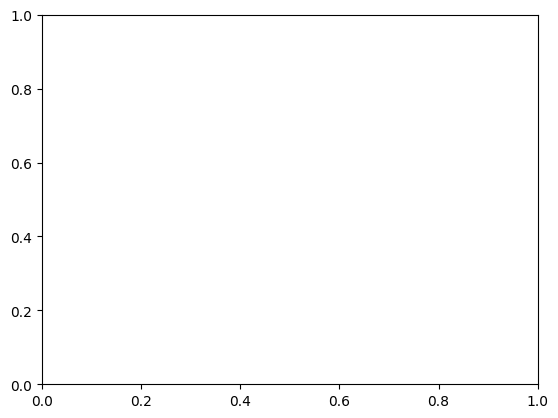

In [44]:
# Visualization
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5

xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.1), torch.arange(y_min, y_max, 0.1))

z = model(torch.cat((xx.reshape(-1,1), yy.reshape(-1,1)), dim=1)).argmax(dim=1)
z = z.reshape(xx.shape)

plt.contourf(xx, yy, x, alpha=0.4)
plt.scatter(x[:, 0], s[:, 1], c=y, s=20, edgecolors='k')

plt.title('Softmax Regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()